In [143]:
import random
import time
import math
import pandas as pd
import matplotlib.pyplot as plt
from yahoo_finance import Share
from datetime import date
%matplotlib inline
plt.style.use('ggplot')

# Problem

Let's do some analysis of [Microsoft](http://microsoft.com) stocks performance in 2006-2015 years. The goal is to find a set of two days in this period of time, so a share bought on the first day and sold on the second day **yields maximum return**.

In [144]:
msft = Share('MSFT').get_historical('2006-01-01', '2016-01-01')

In [145]:
msftTimeSeries = pd.DataFrame(msft)
msftTimeSeries = msftTimeSeries.set_index(msftTimeSeries.Date.astype(date))
msftTimeSeries = msftTimeSeries.drop(['Date', 'Symbol'], axis = 1)
msftTimeSeries.Close = msftTimeSeries.Close.astype(float)
msftTimeSeries = msftTimeSeries.sort_index()

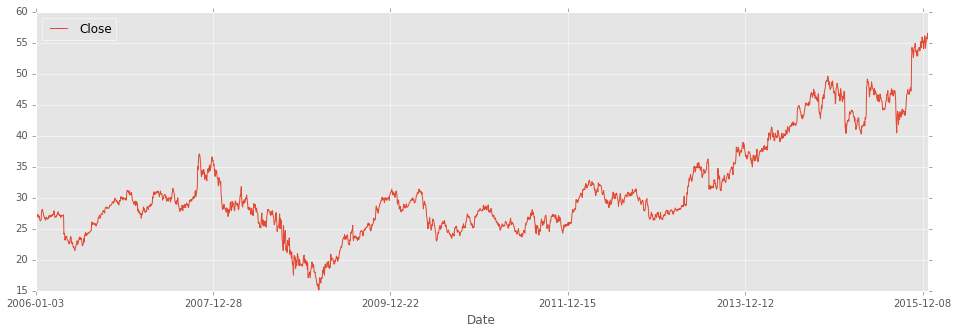

In [146]:
msftTimeSeries.plot(figsize=(16, 5))

# Solutions

### Brute force

The straightfoward solution is to calculate return for every possible combination of two days and take dates pair with maximum return. The number of pairs is: $$\left(\begin{array}{l}n\\2\end{array}\right)$$ so the running time is: $$T(n) = \theta(n^2)$$

Can we do better?

### Divide and Conquer

In [147]:
def find_max_crossing_subarray(input, low, mid, high):
    leftSum = float("-inf")
    sum = 0
    maxLeft = -1
    for i in range(mid, low - 1, -1):
        sum = sum + input[i]
        if sum > leftSum:
            leftSum = sum
            maxLeft = i
    rightSum = float("-inf")
    sum = 0
    maxRight = -1
    for j in range(mid + 1, high + 1):
        sum = sum + input[j]
        if sum > rightSum:
            rightSum = sum
            maxRight = j
    return (maxLeft, maxRight, leftSum + rightSum)

In [148]:
def find_max_subarray(input, low, high):
    if high == low:
        return (low, high, input[low])
    else:
        mid = math.floor((low + high) / 2)
        (leftLow, leftHigh, leftSum) = find_max_subarray(input, low, mid)
        (rightLow, rightHigh, rightSum) = find_max_subarray(input, mid + 1, high)
        (crossLow, crossHigh, crossSum) = find_max_crossing_subarray(input, low, mid, high)
        if leftSum >= rightSum and leftSum >= crossSum:
            return (leftLow, leftHigh, leftSum)
        elif rightSum >= leftSum and rightSum >= crossSum:
            return (rightLow, rightHigh, rightSum)
        else:
            return (crossLow, crossHigh, crossSum)

Runnint time is: $$T(n) = \theta(nlog(n))$$ 

In [149]:
input = list(msftTimeSeries.Close.diff().dropna())
(buyDateIndex, sellDateIndex, profit) = find_max_subarray(input, 0, len(input) - 1)
buyDate = msftTimeSeries.index[buyDateIndex]
sellDate = msftTimeSeries.index[sellDateIndex]
(buyDate, sellDate, profit)

('2009-03-09', '2015-12-28', 41.399999000000001)

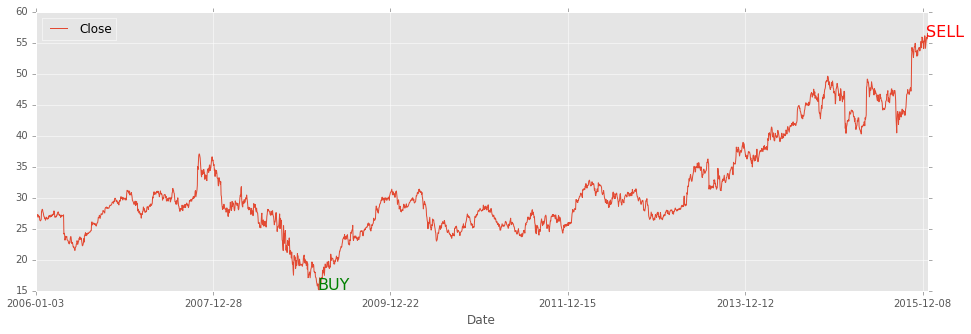

In [150]:
ax = msftTimeSeries.plot(figsize=(16, 5))
ax.text(buyDateIndex, msftTimeSeries.Close[buyDateIndex], 'BUY', color = 'g', fontsize = 16)
ax.text(sellDateIndex, msftTimeSeries.Close[sellDateIndex], 'SELL', color = 'r', fontsize = 16)